In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
figpath = os.path.join(os.path.expanduser('~'), 'Data/Figures_IBL')

## same plot but with ONE

In [2]:
## REPEAT WITH ONE
from oneibl.one import ONE
one = ONE()
trajs = one.alyx.rest('trajectories', 'list')
traj = pd.DataFrame(list(trajs))

# get the subject info out of the 'session' column
for kix, k in enumerate(traj.session[0].keys()):
    tmp_var = []
    for id, c in traj.iterrows():
        if k in c['session'].keys():
            tmp = c['session'][k]
        else:
            tmp = np.nan
        tmp_var.append(tmp)
        # also add the date
    traj[k] = tmp_var
    
# save to csv - for Steven
traj = traj.drop(columns=['session'])
traj = traj.sort_values(by=['subject'])
traj.to_csv('trajectories_from_alyx.csv')

Connected to https://alyx.internationalbrainlab.org as anneu


In [3]:
# traj['theta_name'] = traj['theta'].map({10:'10deg', 15:'15deg', 17:'17deg'})
# traj['probe_name'] = traj.probe_name + ', ' + traj['theta'].round().apply(str)
traj['session_date'] = traj['start_time'].str[0:10] + ', ' + traj.probe_name
print(traj.columns)

Index(['id', 'probe_insertion', 'x', 'y', 'z', 'depth', 'theta', 'phi', 'roll',
       'provenance', 'probe_name', 'coordinate_system', 'datetime', 'json',
       'subject', 'start_time', 'number', 'lab', 'task_protocol',
       'session_date'],
      dtype='object')


In [4]:
# one panel for each sj + provenance
sps = []
for sj in traj.subject.unique():
    for pr in traj.provenance.unique():
        sps.append(sj + ', ' + pr)
        
traj['spname'] = traj.subject + ', ' + traj.provenance
traj = traj.sort_values(by='spname')

## show targeted and histology AP coords side by side

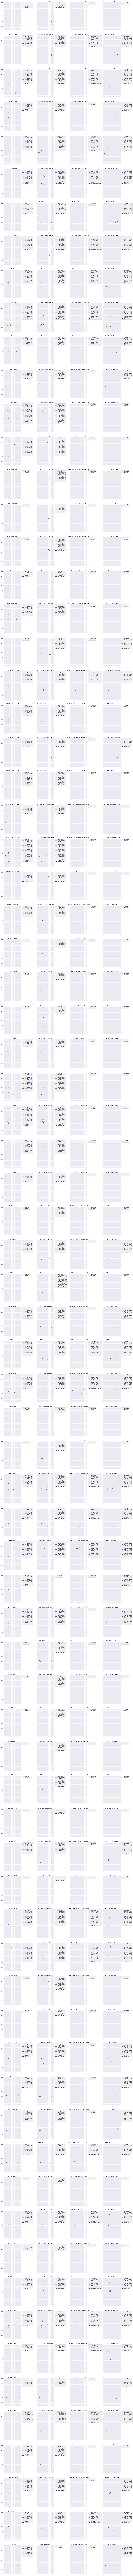

In [5]:
sns.set(style="darkgrid", context="paper")
markers = ["s", "^", 'o', 's', 'v', 'P', '*', 'h', '^', 'H', 'D', 'd', 'X','p']
g, axes = plt.subplots(int(np.ceil(len(sps)/4)), 4, figsize=(20, 2*traj.spname.nunique()), sharex=True, sharey=True)

for sp, ax in zip(sps, axes.flatten()):
    
    df = traj[traj.spname==sp]
    if len(df) > 0: # same colors across 3 subplots
        dates = traj[traj.subject==df.subject.unique().item()]['session_date'].unique()

    sns.lineplot(data=df, x='x', y='y', hue="session_date", style="provenance", 
                 hue_order=sorted(dates), 
                 style_order=sorted(df.provenance.dropna().unique()), 
                 markers=markers, linewidth=0, markersize=8, mfc='none', mec='auto',
                 palette="Paired", markeredgewidth=1,
                 ax=ax, legend='full', dashes=False)

    ax.set_title(sp, fontsize=12)
    ax.set(xlim=[-4500, 4500], ylim=[-7750, 4250], xlabel='', ylabel='')
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='minor')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.savefig('trajectories_accuracy.pdf')